In [30]:
from pathlib import Path
import numpy as np
import sys, os

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
data_dir = Path('../data/2sample_tests')
file_names = [
    #'DCORR_restricted_perm_results_dict_10000_min_rank-ZG3.pkl',
    #'DCORR_restricted-zeroed-centered_results_dict_10000_min_rank-ZG3.pkl',
    'MGC_restricted_perm_results_dict_10000_min_rank-ZG3.pkl',
    'MGC_restricted-zeroed-centered_results_dict_10000_min_rank-ZG3.pkl',
]

In [10]:
with open(data_dir / file_names[0], 'rb') as handle:
    data_dict = pickle.load(handle)

In [14]:
data_dict['Experts Resting vs. Experts Compassion'][0]#.keys()

{'pvalue': 0.1041,
 'test_stat': -0.03901753295542519,
 'null_dist': array([-0.07054702, -0.07010128, -0.05397411, ..., -0.01939535,
        -0.05999606, -0.06313587]),
 'opt_scale': [58, 2]}

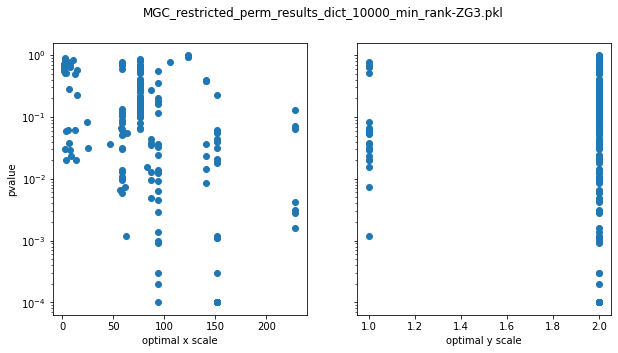

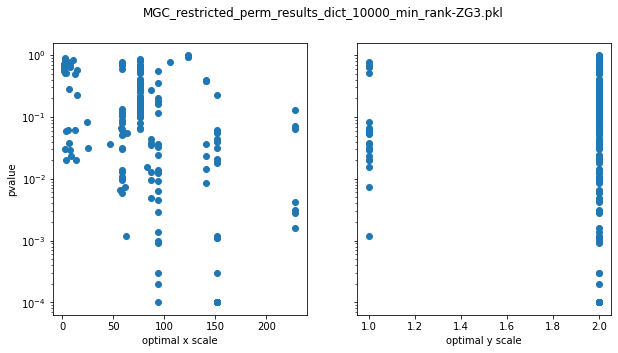

In [37]:
for i in range(2):
    i = 0
    with open(data_dir / file_names[i], 'rb') as handle:
        data_dict = pickle.load(handle)

    f, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
    pvals = []
    opt_xscales = []
    opt_yscales = []
    for key,val_dict in data_dict.items():
        for grad, mgc_dict in val_dict.items():
            pvals.append(mgc_dict['pvalue'])
            opt_xscales.append(mgc_dict['opt_scale'][0])
            opt_yscales.append(mgc_dict['opt_scale'][1])
    axes[0].scatter(opt_xscales, pvals)
    axes[0].set_ylabel('pvalue')
    axes[0].set_xlabel('optimal x scale')
    axes[0].set_yscale('log')
    axes[1].scatter(opt_yscales, pvals)
    axes[1].set_xlabel('optimal y scale')

    plt.suptitle(file_names[i])
    plt.show()